# INDIAN_FOOD_ANALYSIS_VISUALIZATION

<img src="https://www.pngkey.com/png/full/254-2548461_indian-flavour-indian-flavour-indian-food-logo-png.png" width="400" height="200">

# Content

__Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, in particular Hinduism, cultural choices and traditions.__

__This dataset consists of information about various Indian dishes, their ingredients, their place of origin, etc.__

# Column Description

__name__ : name of the dish

__ingredients__ : main ingredients used

__diet__ : type of diet - either vegetarian or non vegetarian

__prep_time__ : preparation time

__cook_time__ : cooking time

__flavor_profile__ : flavor profile includes whether the dish is spicy, sweet, bitter, etc

__course__ : course of meal - starter, main course, dessert, etc

__state__ : state where the dish is famous or is originated

__region__ : region where the state belongs

__Presence of -1 in any of the columns indicates NaN value.__

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline
from random import random
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [4]:
data=pd.read_csv("indian_food.csv")
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## Data_Insight

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [4]:
data.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [5]:
data.shape

(255, 9)

In [6]:
data.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

In [7]:
data.diet.value_counts()

vegetarian        226
non vegetarian     29
Name: diet, dtype: int64

## Null_values

In [8]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

## Filling_null_values

In [10]:
data.fillna("East")

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [11]:
data['diet']=data['diet'].replace('non vegetarian','non_vegetarian')

In [12]:
data[data.diet=='non_vegetarian'].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
64,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non_vegetarian,10,40,spicy,main course,Assam,North East
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non_vegetarian,-1,-1,spicy,main course,Tripura,North East
67,Galho,"Rice, axone, salt, water, chillies, pork",non_vegetarian,5,15,spicy,main course,Nagaland,North East
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non_vegetarian,30,120,spicy,main course,Telangana,South
76,Butter chicken,"Chicken, greek yogurt, cream, garam masala pow...",non_vegetarian,10,35,spicy,main course,NCT of Delhi,North


In [13]:
data[data.region.isnull()]="north"

In [14]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

## Pie_chart

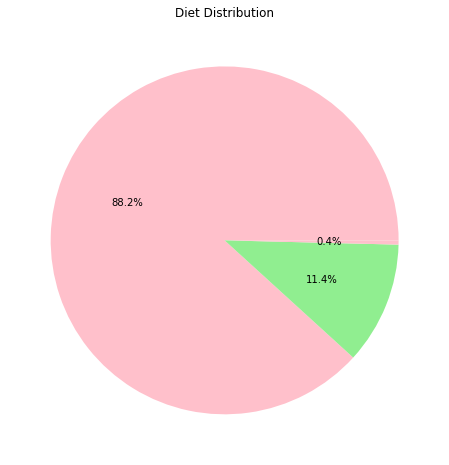

In [15]:
plt.figure(figsize=(12,8))
diet_pie=data.diet.value_counts()
colors = ['pink','lightgreen']
plt.pie(diet_pie,autopct = '%1.1f%%',colors=colors)
plt.title('Diet Distribution')
plt.show()

## State_wise_data_distribution

In [16]:
data_count=data.state.value_counts()
data_count=data_count.reset_index(name="counts")
data_count

,index,counts
0,Gujarat,35
1,Punjab,32
2,Maharashtra,30
3,-1,24
4,West Bengal,24
5,Assam,21
6,Tamil Nadu,20
7,Andhra Pradesh,10
8,Uttar Pradesh,8
9,Kerala,8


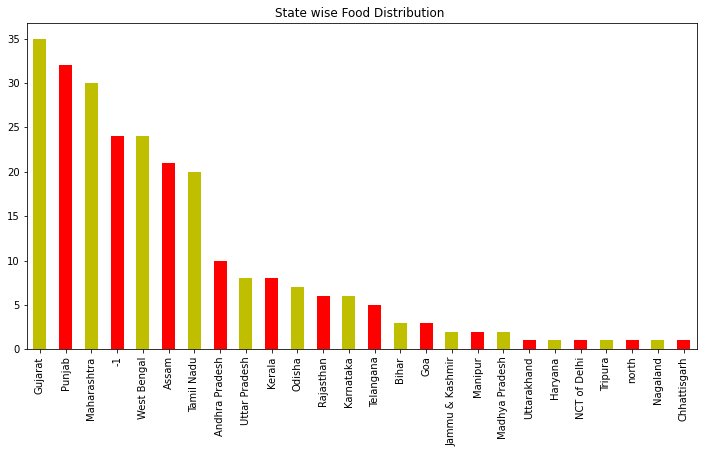

In [17]:
plt.figure(figsize=(12,6))
colors =['y','r']
data['state'].value_counts().plot(kind='bar',color=colors)
plt.title('State wise Food Distribution ')
plt.show()

## Food_course_Distribution

In [18]:
data_course=data.course.value_counts()
data_course

main course    129
dessert         84
snack           39
starter          2
north            1
Name: course, dtype: int64

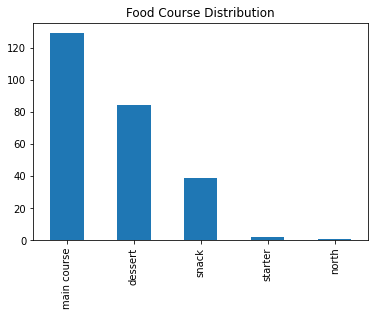

In [19]:
data.course.value_counts().plot(kind='bar')
plt.title('Food Course Distribution')
plt.show()

## Region wise Food Distribution Plot

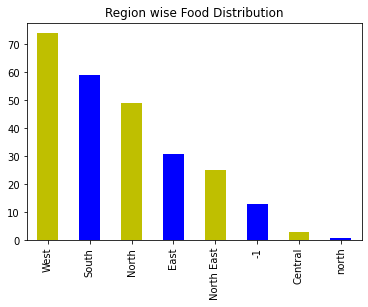

In [20]:
colors = ['y','b']
data.region.value_counts().plot(kind='bar',color=colors)
plt.title('Region wise Food Distribution')
plt.show()

## Flavor wise Food Distribution Plot

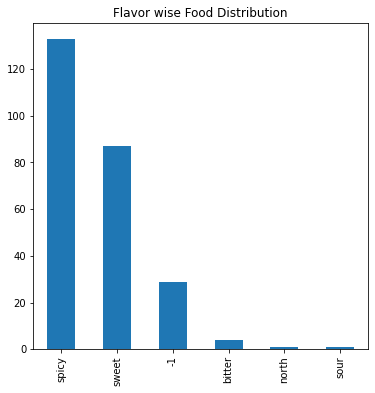

In [21]:
plt.figure(figsize=(6,6))
data.flavor_profile.value_counts().plot(kind='bar')
plt.title('Flavor wise Food Distribution')
plt.show()

## Outliers in Preparation time Plot

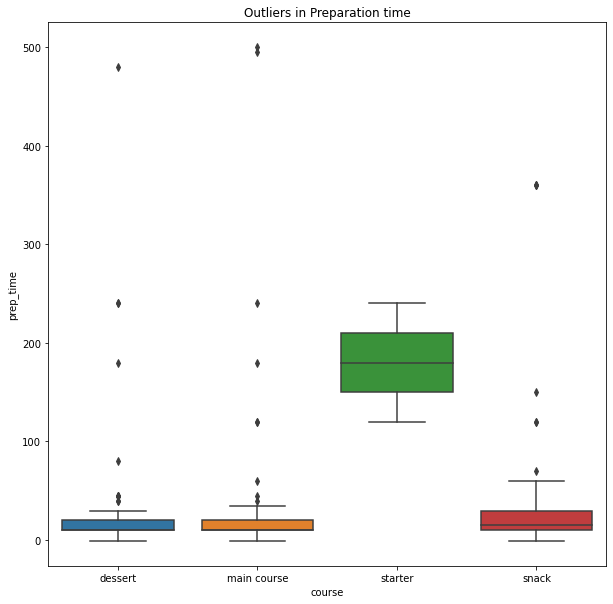

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x ='course', y ='prep_time')
plt.title("Outliers in Preparation time")
plt.show()

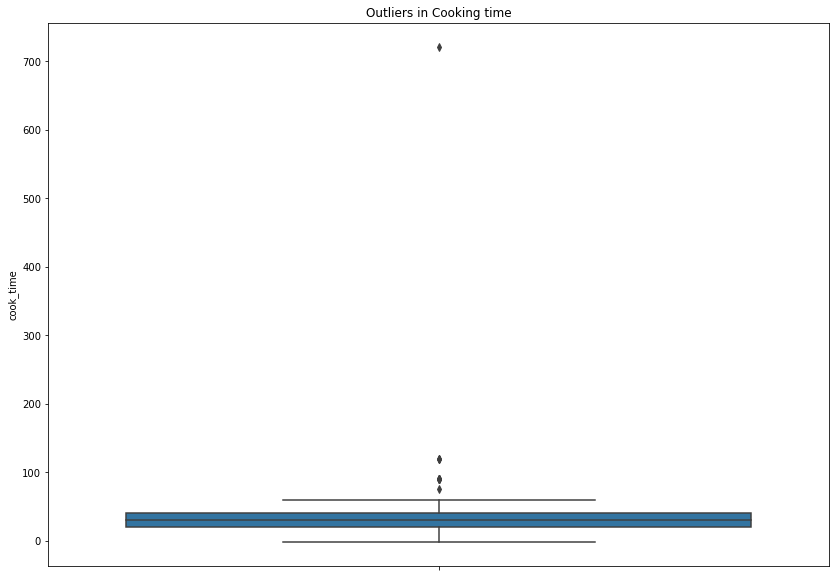

In [26]:
plt.figure(figsize=(14, 10))

sns.boxplot(data = data, y = 'cook_time')
plt.title("Outliers in Cooking time")

plt.show()

In [27]:
data['ingredients']=data.ingredients.apply(lambda x: x.split(","))

In [28]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[Maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"[Gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, rai...",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[Flour, ghee, kewra, milk, clarified butte...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[Milk powder, plain flour, baking powder, g...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [29]:
data.loc[data['flavor_profile'] == 'bitter', 'ingredients'].head(1)

71    [Potato,  fenugreek leaves,  chillies,  salt, ...
Name: ingredients, dtype: object

In [30]:
ind=data.loc[data['name'] == 'Aloo methi']

In [31]:
ind.ingredients

71    [Potato,  fenugreek leaves,  chillies,  salt, ...
Name: ingredients, dtype: object

In [32]:
sorted_data=data.prep_time>50
data[sorted_data]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
1,Boondi,"[Gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
29,Misti doi,"[Milk, jaggery]",vegetarian,480,30,sweet,dessert,West Bengal,East
33,Ras malai,"[Chhena, reduced milk, pistachio]",vegetarian,180,60,sweet,dessert,West Bengal,East
46,Obbattu holige,"[Maida flour, turmeric, coconut, chickpeas,...",vegetarian,180,60,sweet,main course,Karnataka,South
48,Poornalu,"[Chana dal, jaggery]",vegetarian,240,60,sweet,dessert,Andhra Pradesh,South
66,Chak Hao Kheer,"[Rice, milk, sugar, cardamom]",vegetarian,240,45,sweet,dessert,Manipur,North East
81,Chicken Tikka,"[Chicken, whole wheat bread, rice flour, ga...",non vegetarian,120,45,spicy,starter,Punjab,North
104,Naan,"[Whole wheat flour, honey, butter, garlic]",vegetarian,60,30,-1,main course,Punjab,North
114,Pindi chana,"[Fennel, tea bags, tomato, kasuri methi, c...",vegetarian,500,120,spicy,main course,Punjab,North
122,Tandoori Chicken,"[Greek yogurt, garam masala, kasuri methi, ...",non vegetarian,240,30,spicy,main course,Punjab,North


## Total prepartion and cooking time taken by dish Plot

In [33]:
sorted_data=data.loc[sorted_data,["name","prep_time","cook_time"]]
sorted_data.set_index(["name"],inplace=True)
sorted_data

,prep_time,cook_time
name,,
Boondi,80,30
Misti doi,480,30
Ras malai,180,60
Obbattu holige,180,60
Poornalu,240,60
Chak Hao Kheer,240,45
Chicken Tikka,120,45
Naan,60,30
Pindi chana,500,120


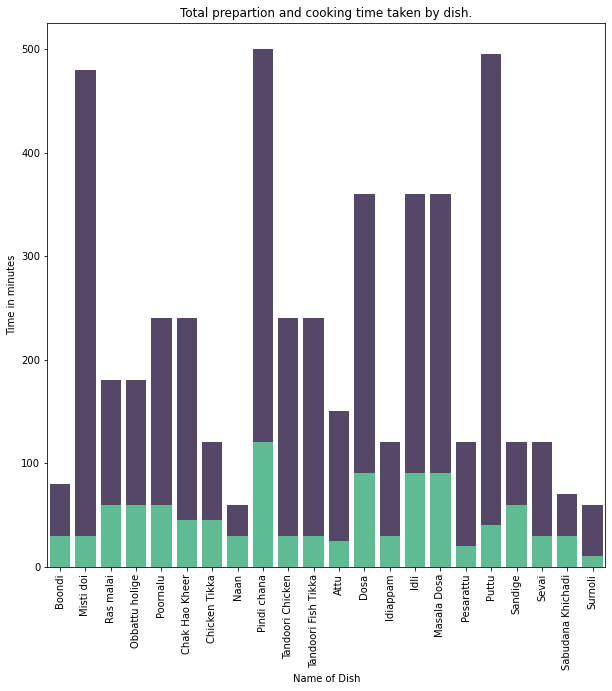

In [34]:
fig=plt.figure(figsize=(10,10))
sns.barplot(data=sorted_data,x=sorted_data.index,y="prep_time",color="#54436B", label="Preparation Time")
sns.barplot(data=sorted_data,x=sorted_data.index,y="cook_time",color="#50CB93", label="Cooking Time")
plt.xticks(rotation=90)
plt.xlabel("Name of Dish")
plt.ylabel("Time in minutes")
plt.title("Total prepartion and cooking time taken by dish.")
plt.show()

## Total prepartion and cooking time taken by dish Plot

In [57]:
min_time=data.prep_time < 50
data[min_time]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[Maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, rai...",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[Flour, ghee, kewra, milk, clarified butte...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[Milk powder, plain flour, baking powder, g...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"[Sugar syrup, lentil flour]",vegetarian,10,50,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"[Glutinous rice, black sesame seeds, gur]",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"[Coconut milk, egg yolks, clarified butter, ...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"[Cottage cheese, dry dates, dried rose petal...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"[Milk powder, dry fruits, arrowroot powder, ...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [72]:
min_time=data[["name","prep_time","cook_time"]]
min_time=min_time.sort_values(by="cook_time",ascending=False).head(10)
min_time.set_index(["name"],inplace=True)
min_time

,prep_time,cook_time
name,,
Shrikhand,10,720
Malapua,10,120
Biryani,30,120
Pindi chana,500,120
Rasgulla,10,90
Rajma chaval,15,90
Daal baati churma,10,90
Dosa,360,90
Idli,360,90


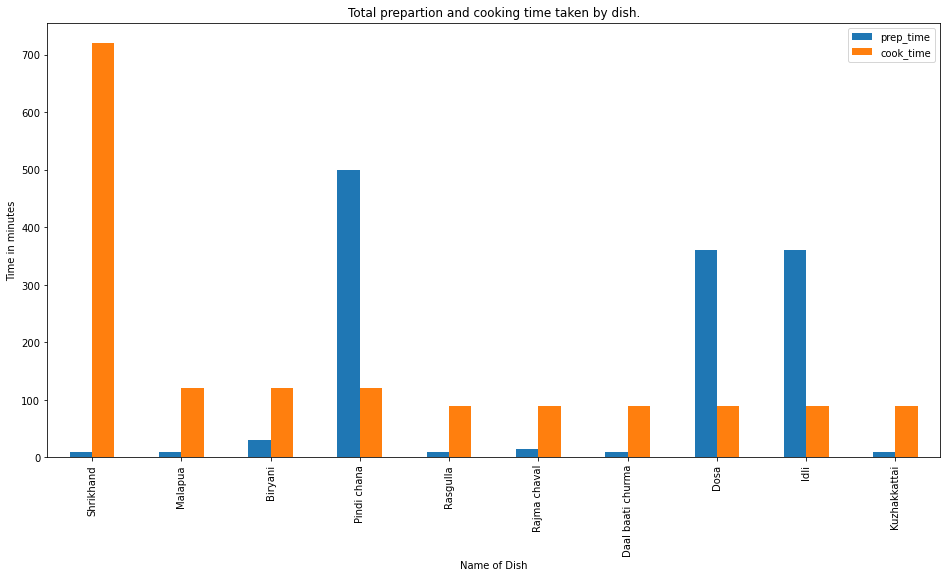

In [76]:

min_time.plot(kind='bar', figsize=(16, 8))
plt.xticks(rotation=90)
plt.xlabel("Name of Dish")
plt.ylabel("Time in minutes")
plt.title("Total prepartion and cooking time taken by dish.")
plt.show()

## Defining Total Time

In [122]:
data["total"]=data["prep_time"]+data["cook_time"]

In [123]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East,55


In [80]:
total_time=data[["name","flavor_profile","total"]]

In [92]:
total_time=total_time.sort_values(by="total",ascending=False).head(10)
total_time=total_time.set_index("name")
total_time

,flavor_profile,total
name,,
Shrikhand,sweet,730
Pindi chana,spicy,620
Puttu,-1,535
Misti doi,sweet,510
Dosa,spicy,450
Masala Dosa,spicy,450
Idli,spicy,450
Poornalu,sweet,300
Chak Hao Kheer,sweet,285


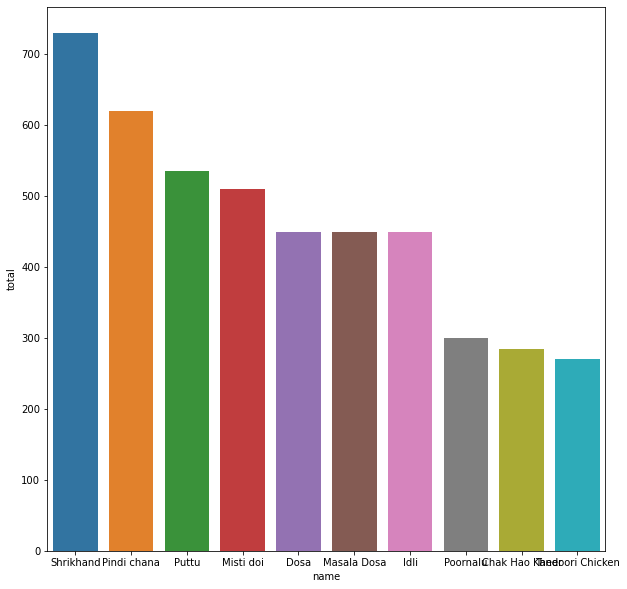

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(data=total_time,x=total_time.index,y="total")
plt.show()

In [112]:
data.head(1)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East


## Average Time per flavour

In [131]:
flvr_data=data.groupby("flavor_profile").mean()
flvr_data=flvr_data.sort_values(by=["total"],ascending=False)
flvr_data

,prep_time,cook_time,total
flavor_profile,,,
sweet,28.397727,44.136364,72.534091
spicy,32.428571,30.872180,63.300752
-1,36.206897,22.586207,58.793103
bitter,15.000000,37.500000,52.500000
sour,10.000000,10.000000,20.000000


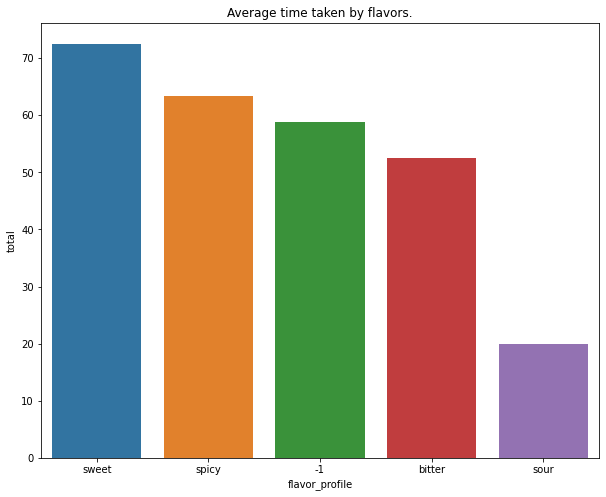

In [133]:
plt.figure(figsize=(10, 8))

sns.barplot(x=flvr_data.index, y=flvr_data.total, data=flvr_data)

plt.title("Average time taken by flavors.")
plt.show()

## Per region

In [139]:
grp_data=pd.DataFrame(data.groupby(by=['flavor_profile', 'region']).count().name)
grp_data

name
flavor_profile region          
-1             -1             2
               East           3
               North          2
               North East     5
               South         10
               West           7
bitter         North          2
               West           2
sour           West           1
spicy          -1             6
               Central        2
               East           6
               North         35
               North East    13
               South         30
               West          41
sweet          -1             5
               Central        1
               East          22
               North         10
               North East     7
               South         19
               West          23

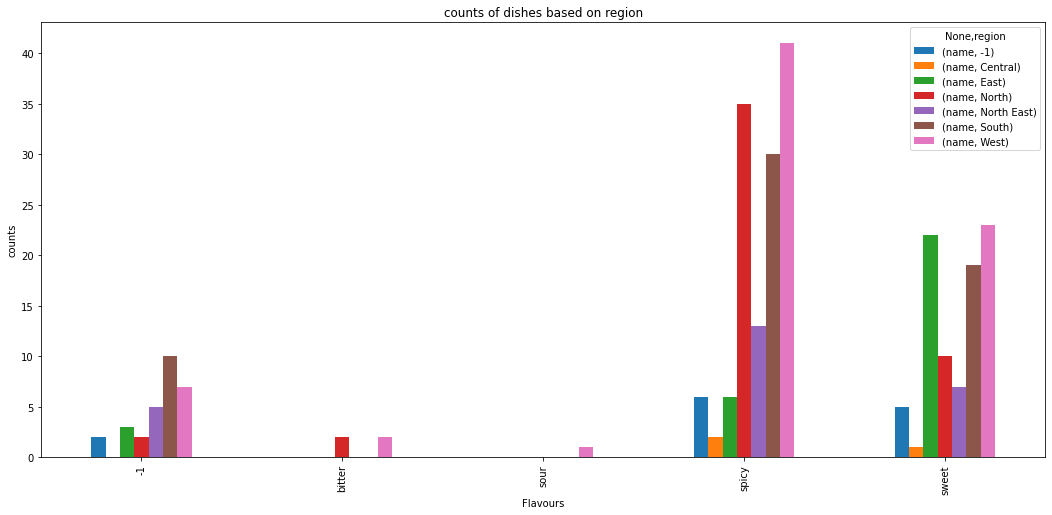

In [140]:
grp_data.unstack().plot(kind='bar', figsize=(18, 8))

plt.xlabel("Flavours")
plt.ylabel('counts')
plt.title("counts of dishes based on region")

plt.show()

## Per Diet

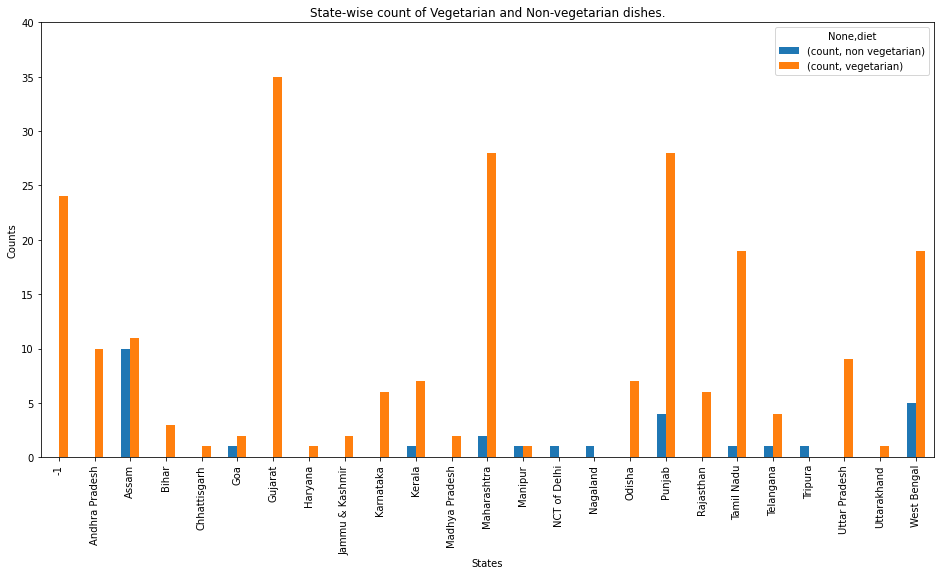

In [142]:
a = pd.DataFrame(data.groupby(by=['state', 'diet']).count().name)
a.rename(columns = {'name':'count'}, inplace=True)
a.unstack().plot(kind='bar', figsize=(16, 8))
plt.ylim(0, 40)
plt.xlabel("States")
plt.ylabel("Counts")
plt.title("State-wise count of Vegetarian and Non-vegetarian dishes.")
plt.show()

## Vegetarian_data_per_state

In [163]:
vegi_data=data[data["diet"]== "vegetarian"]["state"].value_counts().reset_index()
vegi_data=vegi_data.reset_index()
vegi_data.set_index("level_0")
vegi_data

,level_0,index,state
0,0,Gujarat,35
1,1,Maharashtra,28
2,2,Punjab,28
3,3,-1,24
4,4,Tamil Nadu,19
5,5,West Bengal,19
6,6,Assam,11
7,7,Andhra Pradesh,10
8,8,Uttar Pradesh,9
9,9,Kerala,7


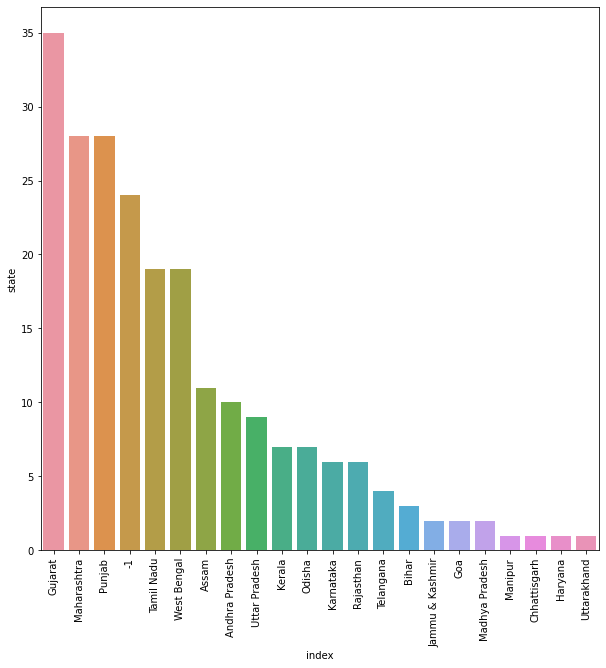

In [166]:
plt.figure(figsize=(10,10))
sns.barplot(data=vegi_data,x=vegi_data["index"],y="state")
plt.xticks(rotation=90)
plt.show()

# THE END!